# RMSD plots

### just average RMSD analysis here

In [1]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import matplotlib as mpl
import numpy as np


import sys
sys.path.append('../') ## to get src lib
import src.analysis_functions as analysis_functions
import src.simulation_metadata as sims
from src.figure_parameters import figure_rc_params


# MMV crystal structure RMSD

RMSD of protein and ligand, simple

In [10]:
def plot_lig_prot_rmsd_all_reps(
        ax:np.array(plt.Axes),
        sim: sims.SimulationMetadata,
        color_l: list[str]
) -> plt.Axes:
    """ 
    This function will call the RMSD calculation 
    on your simulation and plot two subplot rows,
    top row will be protein RMSD, bottom row is ligand RMSD

    The plot is just per replica, and the color list is just a 
    list of colors you want it to be. The simulation metadata
    does have color attribute, but currently I want to be able
    to see each replica, so you have to tinker a bit right now
    """
    
    ### first, call RMSD
    for n,u_rep in enumerate(all_unis[sim.name]):
        rmsd = analysis_functions.calc_rmsd(
                u=u_rep,
                ref_name=sim.ref_path,
                select="backbone",
                groupselections=[f'resname {sim.ligname}']
        )

        ### replica labels can be here
        label = f'Replica {n+1} ({all_lens[sim.name][n]-1}ns)'

        ## plot protein RMSD
        ax[0].plot(rmsd[:,2],
                color=color_l[n],
                linewidth=1,
                label=label)
        
        ## plot ligand RMSD
        ax[1].plot(rmsd[:,3],
                color=color_l[n],
                linewidth=1,
                label=label)
        
    ax[0].legend()
    ax[1].set_xlabel('Time (ns)', )
    ax[1].set_ylabel('Ligand RMSD (Å)')
    ax[0].set_ylabel('Protein RMSD (Å)')

    return ax

## MMV crystal sims

In [17]:
sim_list = [sims.PfHT_MMV_crystal]
color_l = [sim.color for sim in sim_list]

all_unis, all_lens = analysis_functions.load_unis(
    sim_list= sim_list
)

color_l = ['#D39C00', '#F28705', '#F2DC9B', '#F2B705']
sim = sim_list[0]

with mpl.rc_context(figure_rc_params):
    f,ax = plt.subplots(nrows=2, ncols=1, figsize=(10,5), sharex=True)
    ax= np.ravel(ax)
    
    ax = plot_lig_prot_rmsd_all_reps(ax,
                                     sim=sim,
                                     color_l=color_l)
    ax[0].set_xlim(0,1400)
    ax[1].set_ylim(1,9)
    ax[0].set_ylim(1,9)

    plt.tight_layout()
    plt.savefig(f'../../../images_paper/simulations/replica_RMSD.{sim.name}.svg')

## MMV EM sims

In [18]:
sim_list = [sims.PfHT_MMV12]
color_l = [sim.color for sim in sim_list]

all_unis, all_lens = analysis_functions.load_unis(
    sim_list= sim_list
)
color_l = ['#618c03', '#D1FA7B', '#2C5900']
sim = sim_list[0]

with mpl.rc_context(figure_rc_params):
    f,ax = plt.subplots(nrows=2, ncols=1, figsize=(10,5), sharex=True)
    ax= np.ravel(ax)
    
    ax = plot_lig_prot_rmsd_all_reps(ax,
                                     sim=sim,
                                     color_l=color_l)
    ax[0].set_xlim(0,1000)
    ax[1].set_ylim(1,9)
    ax[0].set_ylim(1,9)

    plt.tight_layout()
    plt.savefig(f'../../../images_paper/simulations/replica_RMSD.{sim.name}.svg')

### plotting RMSD of MMV in crystal structure vs MMV in EM structure

In [3]:
ref_test = mda.Universe('../../../EM_MMV/MMV12/replica_1/production/PfHT_MMV12.em.1.0_200ns.protonly.tpr',
                        '../../../EM_MMV/MMV12/replica_1/production/PfHT_MMV12.em.1.start.protonly.gro')

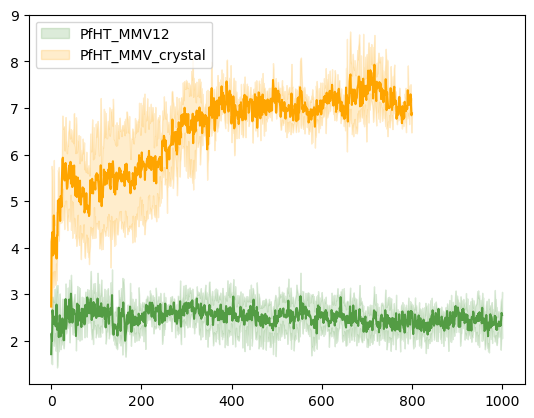

In [4]:
mean_cutoff = 1400
for sim in sim_list:
    lig_rmsds = np.zeros((3,1400))
    for n,u_rep in enumerate(all_unis[sim.name]):
        rmsd = analysis_functions.calc_rmsd(
            u=u_rep,
            ref_name=sim.ref_path,
            select="backbone",
            groupselections=['resname MMV']
        )
        lig_rmsds[n,:all_lens[sim.name][n]] = rmsd[:,3] ##3 is lig
    #plot until shortest replica len    
    lig_rmsds = lig_rmsds[:,:min(all_lens[sim.name])]
    plt.plot(np.mean(lig_rmsds,axis=0),
              color=sim.color)
    plt.fill_between(range(0,np.shape(lig_rmsds)[1]),
                     np.mean(lig_rmsds,axis=0)-np.std(lig_rmsds,axis=0),
                     np.mean(lig_rmsds,axis=0)+np.std(lig_rmsds,axis=0),
                     alpha=0.2,
                     color=sim.color,
                     label=sim.name)

plt.legend()